# Using Percentile Method for Outlier Detection & Treatment  
## (Trimming and Winsorization / Capping)

---

## 1. What is the Percentile Method?

The **Percentile Method** is an outlier detection and handling technique based on **quantiles (percentiles)** of the data instead of mean and standard deviation.

A percentile indicates the value below which a given percentage of observations fall.

Examples:
- 1st percentile → 1% of data lies below this value
- 99th percentile → 99% of data lies below this value

Values beyond extreme percentiles are treated as **outliers**.

---

## 2. Why Use the Percentile Method?

- Works well for **skewed distributions**
- Does **not assume normality**
- Simple, intuitive, and business-friendly
- Commonly used in real-world datasets (finance, sales, marketing)

---

## 3. General Percentile-Based Outlier Detection

### Step 1: Select percentile thresholds  
Common choices:
- 1% and 99%
- 5% and 95%
- 2.5% and 97.5%

### Step 2: Compute bounds
\[
Lower\ Bound = P_{low}
\]
\[
Upper\ Bound = P_{high}
\]

### Step 3: Identify outliers
- Values < Lower Bound → outliers
- Values > Upper Bound → outliers

---

## 4. Percentile Method using **Trimming**

### 4.1 What is Trimming?

**Trimming** means **completely removing** observations that fall outside chosen percentile limits.

Outliers are assumed to be **noise or errors**.

---

### 4.2 How Trimming Works

Assume:
- Lower percentile = 5%
- Upper percentile = 95%

Rules:
- Remove values below P₅
- Remove values above P₉₅

---

### 4.3 Example (Trimming)

Original data:
10, 12, 13, 14, 15, 16, 18, 500


- P₅ ≈ 10  
- P₉₅ ≈ 18  

After trimming:

12, 13, 14, 15, 16, 18


Value `500` is removed.

---

### 4.4 Advantages of Trimming

✅ Simple and fast  
✅ Removes extreme noise  
✅ Useful for very large datasets  

---

### 4.5 Disadvantages of Trimming

❌ Permanent data loss  
❌ Dangerous if outliers are meaningful  
❌ Not suitable for small datasets  

---

### 4.6 When to Use Trimming

- Extremely large datasets
- Confirmed data-entry or measurement errors
- When losing some data is acceptable

---

## 5. Percentile Method using **Winsorization (Capping)**

### 5.1 What is Winsorization?

**Winsorization**, also called **Capping**, does **not remove outliers**.  
Instead, extreme values are **replaced** with percentile boundary values.

---

### 5.2 How Winsorization Works

Assume:
- Lower percentile = 5%
- Upper percentile = 95%

Rules:
- Values < P₅ → replaced with P₅
- Values > P₉₅ → replaced with P₉₅

---

### 5.3 Example (Winsorization)

Original data:
10, 12, 13, 14, 15, 16, 18, 500


- P₅ = 12  
- P₉₅ = 18  

After Winsorization:

12, 12, 13, 14, 15, 16, 18, 18


Outliers are capped, not removed.

---

### 5.4 Advantages of Winsorization

✅ Preserves dataset size  
✅ Limits influence of extreme values  
✅ Safer than trimming  
✅ Preferred in ML pipelines  

---

### 5.5 Disadvantages of Winsorization

❌ Introduces artificial boundary values  
❌ Can mask true extreme behavior  
❌ Requires careful percentile choice  

---

### 5.6 When to Use Winsorization

- Small to medium datasets
- Linear or distance-based ML models
- When data preservation is important

---

## 6. Trimming vs Winsorization (Comparison)

| Aspect | Trimming | Winsorization |
|------|---------|--------------|
| Data removed | Yes | No |
| Dataset size preserved | No | Yes |
| Risk of information loss | High | Low |
| Impact on variance | High | Moderate |
| ML preference | Rare | Common |

✅ **Winsorization is generally preferred in Machine Learning**

---

## 7. Percentile Method vs IQR Method

| Feature | Percentile Method | IQR Method |
|------|------------------|-----------|
| Cutoffs | Fixed percentages | Data-adaptive |
| Distribution assumption | None | None |
| Subjectivity | Higher | Lower |
| Business interpretability | High | Medium |
| ML usage | Very common | Very common |

---

## 8. Best Practices (Critical)

- Do not blindly trim data
- Prefer Winsorization over Trimming
- Choose percentiles based on domain knowledge
- Compare model performance before and after handling outliers
- Apply percentile methods **before scaling and modeling**

---

## 9. Interview-Ready One-Liners

- *The percentile method handles skewed data without distribution assumptions.*
- *Trimming removes outliers, Winsorization caps them.*
- *Winsorization preserves data while controlling extreme influence.*
- *Percentile thresholds must be chosen carefully.*

---

## 10. Final Summary

- Percentile method uses quantiles to detect outliers
- Two techniques:
  - **Trimming** → removes extreme data points
  - **Winsorization (Capping)** → caps extreme values
- Winsorization is safer and preferred in ML workflows
- Ideal for skewed, real-world datasets



In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.shape

(10000, 3)

In [ ]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import seaborn as sns

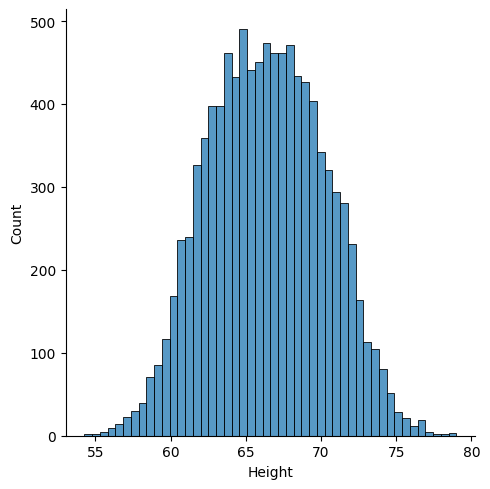

In [ ]:
sns.displot(df['Height'])

<Axes: ylabel='Height'>

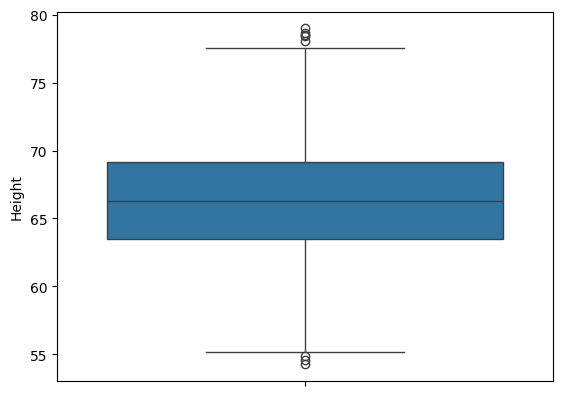

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [ ]:
upper_limit

np.float64(74.7857900583366)

In [ ]:
df[(df['Height'] >= 74.0)]

,Gender,Height,Weight
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
31,Male,74.033808,212.910225
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
...,...,...,...
4843,Male,74.650540,213.320520
4883,Male,74.210521,204.759344
4913,Male,74.217091,222.829851
4959,Male,74.007963,219.895739


In [ ]:
df[(df['Height'] <= 58.0)]

,Gender,Height,Weight
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
5123,Female,56.445685,96.640245
5162,Female,57.961936,112.226984
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [ ]:
ndf = df[(df['Height'] <= 74.0) & (df['Height'] >= 58.0)]

In [ ]:
ndf.shape

(9713, 3)

In [ ]:
ndf['Height'].describe()

,Height
count,9713.000000
mean,66.277788
std,3.582063
min,58.032173
25%,63.539584
50%,66.261795
75%,69.030491
max,73.995311


<Axes: ylabel='Height'>

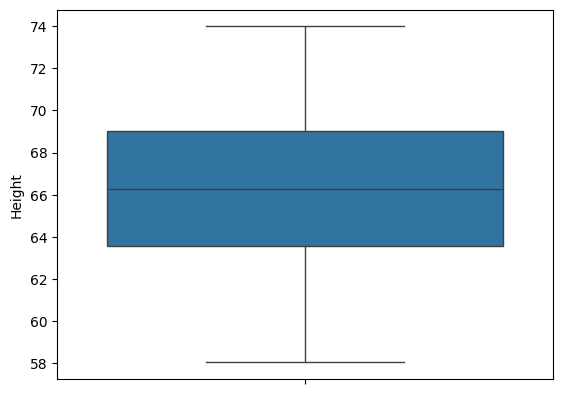

In [ ]:
sns.boxplot(ndf['Height'])

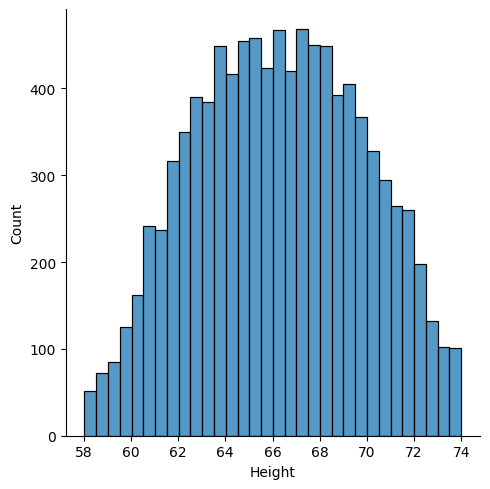

In [ ]:
sns.displot(ndf['Height'])

# Winsorization_Technique_Capping

In [ ]:
df1 = df.copy()

In [ ]:
# Capping -- > Winsorization
df1['Height'] = np.where(df['Height'] >= upper_limit,
upper_limit,
np.where(df['Height'] <= lower_limit,
lower_limit,
df['Height']))

df1.shape

(10000, 3)

In [ ]:
df1['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<Axes: ylabel='Height'>

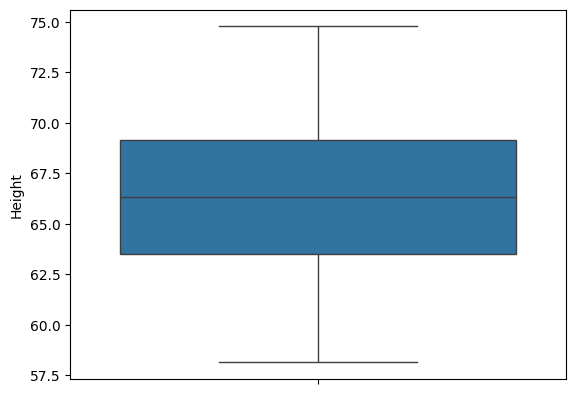

In [ ]:
sns.boxplot(df1['Height'])

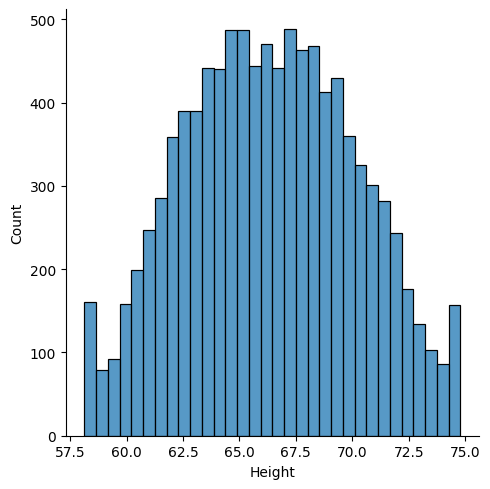

In [ ]:
sns.displot(df1['Height'])